## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_tcp_full_scan_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16470.484107
Name: time, dtype: float64

In [4]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    16470.484107
1    16470.533064
2    16470.539767
3    16470.479397
4    16470.517932
5    16470.572070
6    16470.580187
7    16470.534635
8    16470.574797
9    16470.526073
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    16470.534203
dtype: float64

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

0
count     10.000000
mean   16470.534203
std        0.035076
min    16470.479397
25%    16470.519967
50%    16470.533850
75%    16470.563994
max    16470.580187

## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.3345043778937733



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 39944 143
2 41270 587
3 56552 22
4 59526 21
5 38660 113
6 46788 199
7 52434 256
8 55884 53
9 58210 3389
10 34058 25
11 39946 143
12 56360 554
13 35984 111
14 42044 993
15 57732 8080
16 34398 135
17 57182 995
18 60962 139
19 53534 1723
20 47716 445
21 34532 1720
22 39948 143
23 56790 110
24 36686 80
25 50828 1025
26 36482 443
27 54860 3306
28 40596 8888
29 48186 23
30 52182 5900
31 37750 3260
32 53214 10003
33 39950 143
34 38892 2038
35 60490 5960
36 53938 52673
37 37824 714
38 48958 3333
39 38868 1434
40 52504 1081
41 42576 3828
42 37252 1031
43 43568 2161
44 39952 143
45 53154 38292
46 52768 3551
47 44500 6567
48 43024 1070
49 56944 27355
50 56412 5922
51 51284 49163
52 52762 500
53 50334 10617
54 54594 1061
55 39954 143
56 54714 18988
57 39548 3030
58 58722 17
59 38570 3
60 50178 687
61 54266 5030
62 54814 1198
63 55392 5959
64 55420 1030
65 55798 1099
66 39956 143
67 33872 49160
68 49786 9220
69 53090 1839
70 52402 9010
71 55466 1121
72 42294 42510
73 41158 6389
74 37052 4900
75 3

613 47006 1093
614 32826 513
615 41374 50389
616 40078 143
617 50512 1009
618 48552 64623
619 49230 593
620 59384 2909
621 40204 280
622 46076 9207
623 40250 33354
624 55852 34571
625 33120 1036
626 38622 1001
627 40080 143
628 53436 541
629 40266 3371
630 53586 389
631 44000 5901
632 60888 2701
633 35406 3689
634 44254 3324
635 54646 5357
636 34966 1864
637 55872 7201
638 40082 143
639 45578 1322
640 58912 888
641 47160 6000
642 57926 6779
643 52692 8651
644 49612 49176
645 60076 8701
646 45406 6689
647 40868 32768
648 38672 5800
649 40084 143
650 36964 1755
651 59662 8086
652 43984 524
653 44410 16113
654 55050 648
655 45504 45100
656 46756 3006
657 53582 13456
658 49716 9090
659 51732 9999
660 40086 143
661 35138 497
662 43298 3323
663 51078 32770
664 53054 5566
665 60600 16012
666 39974 8009
667 55374 1126
668 51338 8010
669 46672 1037
670 37914 2046
671 40088 143
672 53032 6004
673 58540 999
674 41326 10024
675 35332 6129
676 38420 1165
677 48878 3007
678 42824 1124
679 56084 2001

181 50742 57797
182 38458 5432
183 37344 5357
184 37972 4445
185 50144 49154
186 43900 2170
187 33444 8888
188 54346 5811
189 48360 16001
190 41976 1027
191 36892 3580
192 46066 8194
193 59298 5989
194 37140 1130
195 50962 25735
196 40436 6667
197 35462 1217
198 33446 8888
199 47020 1812
200 44140 3221
201 56170 32
202 57814 636
203 54358 8084
204 60022 5633
205 37740 50300
206 56588 5002
207 38900 7435
208 34592 9418
209 33448 8888
210 50408 1521
211 42172 10180
212 33554 3945
213 60940 545
214 59472 7938
215 48366 49157
216 58366 2161
217 35258 1035
218 35406 1049
219 46772 5510
220 33450 8888
221 60976 49155
222 56696 60443
223 57420 50636
224 35778 27353
225 55194 1494
226 34228 8087
227 41810 800
228 42462 2191
229 33374 8701
230 56648 9535
231 33452 8888
232 34572 2144
233 55902 9575
234 57740 5962
235 58368 1971
236 40798 19101
237 57856 49175
238 49098 5825
239 45402 13722
240 46344 6689
241 52236 20005
242 33456 8888
243 43722 64680
244 50556 1721
245 54778 301
246 39638 3030


847 33582 8888
848 51548 19315
849 43488 9011
850 48696 16992
851 46366 32780
852 49012 1755
853 46768 61900
854 45308 1057
855 51386 3995
856 51088 32772
857 37746 8290
858 33584 8888
859 45506 10082
860 53384 514
861 44614 5952
862 46264 5810
863 36598 1036
864 35922 4001
865 51332 1761
866 40774 2021
867 39660 4444
868 56536 7496
869 33586 8888
870 56222 1067
871 47862 8651
872 58130 1069
873 41152 5431
874 45158 1102
875 33888 16113
876 35638 12265
877 44150 9103
878 60344 10626
879 53552 50006
880 33588 8888
881 40408 6789
882 48138 1044
883 48678 2323
884 38974 16993
885 37908 9001
886 37818 6346
887 53268 1085
888 42816 3869
889 46336 8300
890 43210 81
891 33592 8888
892 48836 6106
893 46574 9502
894 44092 1111
895 39294 1213
896 42594 55555
897 45236 2710
898 53888 1199
899 56088 49156
900 36844 5960
901 39620 1052
902 33594 8888
903 60208 714
904 40168 808
905 58680 2065
906 42128 7627
907 51654 990
908 42010 32781
909 35370 2099
910 40818 20828
911 34558 5802
912 39872 1455
9

414 47228 3918
415 51180 8099
416 35832 3006
417 39468 18988
418 43760 110
419 43304 2047
420 45020 9594
421 49252 5200
422 47100 20000
423 36038 1084
424 41866 40193
425 54560 55055
426 56160 1216
427 54586 2910
428 52254 9003
429 43764 110
430 42320 2033
431 58738 3031
432 45762 1065
433 40694 8383
434 57514 1023
435 37484 1666
436 59508 16992
437 33330 5001
438 60294 843
439 60564 2049
440 43766 110
441 46774 5510
442 49802 32779
443 38810 5566
444 44648 2323
445 59464 5030
446 58538 5850
447 36482 6788
448 50278 1165
449 38692 49400
450 32772 54328
451 43768 110
452 55862 2002
453 57546 10003
454 56124 6025
455 39204 19780
456 34166 543
457 49598 8500
458 60912 5877
459 52542 3322
460 51700 62078
461 47108 900
462 43772 110
463 50354 1151
464 33354 2041
465 51636 5666
466 38160 3766
467 39522 17877
468 53028 3703
469 47594 5815
470 36974 1090
471 41434 1154
472 58242 32781
473 43774 110
474 60796 6006
475 36842 3221
476 57856 1310
477 53562 5101
478 59776 10001
479 34156 5061
480 5

1081 36062 19315
1082 46948 617
1083 47086 65000
1084 51884 5825
1085 35816 32783
1086 41456 83
1087 50870 2869
1088 39570 259
1089 43902 110
1090 39952 625
1091 46798 5859
1092 59052 2121
1093 45700 7103
1094 35838 705
1095 36662 30718
1096 45290 1217
1097 39328 1000
1098 47482 4998
1099 46386 5431
1 50578 1025
2 36060 443
3 52416 256
4 41254 587
5 39924 143
6 56152 22
7 34514 1720
8 48176 23
9 54844 3306
10 57162 995
11 50580 1025
12 60548 139
13 36674 80
14 34040 25
15 55870 53
16 58186 3389
17 56342 554
18 38644 113
19 42020 993
20 53512 1723
21 57706 8080
22 50582 1025
23 35964 111
24 46766 199
25 56774 110
26 47696 445
27 34390 135
28 40574 8888
29 52164 5900
30 59498 21
31 44084 32783
32 46602 7741
33 50584 1025
34 36450 1095
35 52744 500
36 51170 8022
37 49804 6005
38 53980 9003
39 51704 3128
40 60224 667
41 59816 32769
42 52714 63331
43 56256 3827
44 50586 1025
45 47110 1583
46 60972 49158
47 59742 4242
48 53922 19842
49 45378 6689
50 43050 1105
51 48496 8087
52 56012 2033
53 

648 36792 6007
649 50728 1025
650 60952 8089
651 37746 3260
652 44368 1039
653 41480 1417
654 39116 1600
655 48334 990
656 42430 5907
657 57280 30
658 43398 2068
659 55708 8193
660 50730 1025
661 59644 52848
662 55022 8031
663 55704 1043
664 32996 15003
665 56972 1201
666 39928 458
667 48172 1075
668 59720 3011
669 59576 42
670 54948 5405
671 50732 1025
672 45568 26
673 50006 3920
674 40060 514
675 58888 888
676 60794 1132
677 59304 5801
678 54984 32776
679 52384 4125
680 58816 1122
681 49850 6565
682 50734 1025
683 33478 9200
684 55408 7004
685 36410 6101
686 42678 18040
687 40722 5825
688 48442 6667
689 48090 5510
690 33180 1687
691 43402 2161
692 43734 5120
693 50738 1025
694 56774 4045
695 34464 4003
696 43372 8800
697 49220 5003
698 55664 903
699 52670 2601
700 45326 6001
701 46714 1084
702 52086 3800
703 51734 2875
704 50740 1025
705 36948 548
706 40238 3371
707 45498 9968
708 32888 2119
709 51066 1455
710 42810 1124
711 40604 5988
712 59046 4449
713 56862 2602
714 50954 1137
715

215 51306 5950
216 54866 1218
217 38474 5432
218 46420 3801
219 37824 5414
220 41504 554
221 42102 2920
222 35666 5061
223 40638 500
224 38524 1002
225 41912 2967
226 53650 5998
227 39676 179
228 50756 57797
229 44014 3269
230 54300 5907
231 41506 554
232 54720 56737
233 37460 1137
234 52256 20005
235 54618 49163
236 33758 2394
237 56662 222
238 41360 5959
239 56798 873
240 55682 2222
241 56992 992
242 41508 554
243 34186 7921
244 60898 55056
245 38920 7435
246 57180 52822
247 55682 548
248 49008 5405
249 53018 1151
250 33716 9220
251 52460 161
252 48426 9102
253 41510 554
254 46294 90
255 44820 668
256 33992 5631
257 40232 8001
258 36746 1201
259 44696 465
260 38700 10628
261 35178 1434
262 41256 19350
263 46458 1075
264 41512 554
265 60506 9485
266 35802 27353
267 39194 1687
268 52628 8099
269 37484 4111
270 58436 1007
271 48134 902
272 38158 50300
273 56950 1050
274 48420 7004
275 41514 554
276 37798 2608
277 60370 2103
278 39384 52848
279 59884 1093
280 37748 6565
281 58894 50500
2

882 51356 1761
883 38944 6567
884 54248 1641
885 44448 3920
886 50426 1521
887 45256 2710
888 33334 1089
889 41954 687
890 33892 8652
891 41634 554
892 36060 3880
893 42608 55555
894 35990 4321
895 54378 8084
896 41946 3493
897 40442 6789
898 49696 1063
899 41504 1352
900 42404 3
901 36868 43
902 41638 554
903 33916 16113
904 38112 2008
905 35484 1217
906 51606 3551
907 56026 900
908 42826 3869
909 44170 9103
910 41562 2038
911 38854 33354
912 53944 17877
913 41640 554
914 46282 3300
915 33706 84
916 34970 2718
917 59982 1166
918 52834 1296
919 45588 4662
920 58656 56738
921 33190 1947
922 35962 5087
923 33842 85
924 41642 554
925 38276 2399
926 40470 6667
927 40602 464
928 45524 10082
929 45250 16018
930 37154 10616
931 41492 1058
932 36134 8402
933 58922 18040
934 46736 5922
935 41646 554
936 34360 55600
937 46284 1060
938 51112 32772
939 44682 42
940 45150 42510
941 53314 4900
942 54750 34572
943 49724 32782
944 50958 5225
945 40742 30718
946 41648 554
947 55330 54045
948 35998 3829

449 53414 1063
450 37450 3476
451 39556 135
452 37382 31337
453 53940 6789
454 42104 8083
455 37138 211
456 43856 32781
457 38422 2875
458 54830 254
459 44748 545
460 42574 1583
461 60016 2030
462 39558 135
463 38664 49400
464 36624 23502
465 50806 5566
466 44662 30951
467 58304 4006
468 52716 49163
469 39928 1117
470 60624 1185
471 52354 88
472 34142 7496
473 39560 135
474 51058 1234
475 55244 7627
476 54766 5633
477 50518 1073
478 39954 89
479 48280 1687
480 53214 8084
481 60882 1059
482 43082 10009
483 40006 1236
484 39562 135
485 56378 7004
486 59124 1092
487 40556 5298
488 60356 4900
489 35298 9502
490 57214 1935
491 41470 1050
492 51132 808
493 40554 42510
494 51210 7103
495 39564 135
496 54150 912
497 59750 1080
498 41708 631
499 58280 9011
500 42330 16993
501 49414 3809
502 53600 873
503 44628 5877
504 55678 49999
505 44842 4126
506 39566 135
507 52208 2811
508 46708 55555
509 39798 161
510 45682 3300
511 50322 33354
512 54974 2170
513 54264 1097
514 55392 8087
515 43710 1717
5

16 56748 1025
17 60480 53
18 39162 21
19 37192 139
20 57966 443
21 38026 8080
22 42452 111
23 38262 587
24 52896 3306
25 47160 1723
26 56644 199
27 47248 256
28 54254 445
29 43132 993
30 32856 3389
31 35752 999
32 52576 8087
33 42454 111
34 40208 311
35 36580 8654
36 35172 12265
37 41044 1216
38 36274 163
39 49020 2004
40 44682 30718
41 55748 16000
42 58818 9200
43 40520 10004
44 42456 111
45 57518 2196
46 33238 16001
47 42144 1137
48 52234 9207
49 55616 10003
50 48840 8300
51 50586 1138
52 60034 8222
53 59702 8193
54 54554 8200
55 42458 111
56 42318 7007
57 33616 5962
58 53510 5222
59 35014 1947
60 56718 787
61 33196 3580
62 44244 1111
63 38430 2251
64 49150 3006
65 49858 7512
66 42460 111
67 33144 42
68 48978 33354
69 45524 2717
70 41714 1033
71 33554 6006
72 43448 32773
73 47290 1149
74 51664 21571
75 36258 1972
76 59164 765
77 42462 111
78 49552 6001
79 44708 2022
80 50748 6510
81 48954 1048
82 33824 7911
83 35814 10010
84 52202 222
85 39044 9220
86 55930 10025
87 39926 144
88 4246

683 47982 10009
684 36336 9944
685 51020 5033
686 43692 49160
687 43032 52673
688 58120 5544
689 38292 306
690 46778 3325
691 49614 687
692 51752 777
693 42592 111
694 53844 7402
695 53090 2111
696 36992 5901
697 44426 24444
698 47054 1163
699 46842 2701
700 44524 3300
701 49164 366
702 40452 52848
703 55368 5405
704 42594 111
705 43884 9010
706 34450 1287
707 57132 32
708 43368 280
709 37754 6543
710 57904 1658
711 36060 2001
712 36346 32774
713 50278 5950
714 57228 16016
715 42596 111
716 56048 7002
717 47254 3128
718 56164 9099
719 38090 9110
720 51044 8022
721 38110 7778
722 56102 5101
723 50686 1123
724 42846 3546
725 39430 3
726 42598 111
727 47996 7435
728 33796 6567
729 45870 1494
730 54044 4446
731 35462 1024
732 36736 705
733 34260 1030
734 58566 32775
735 34270 2000
736 37312 9090
737 42600 111
738 55766 6839
739 42872 4445
740 34924 10626
741 36902 44442
742 42834 749
743 48866 1187
744 33296 1503
745 40100 6003
746 38458 3071
747 56288 6002
748 42602 111
749 53604 1998
750

250 47966 37
251 43428 2046
252 56482 1149
253 53520 199
254 37318 2068
255 35610 20000
256 43004 5357
257 52818 4444
258 53290 1334
259 56002 617
260 54276 5903
261 45738 8400
262 35586 2323
263 35098 2020
264 53522 199
265 37484 49153
266 55080 444
267 36246 9944
268 51758 8084
269 40562 3322
270 34678 34571
271 41542 7103
272 37540 6792
273 45132 32776
274 47048 9001
275 53524 199
276 35178 4998
277 38684 9502
278 55434 1123
279 51588 65000
280 41986 42
281 51774 5631
282 41998 163
283 35396 1999
284 60252 667
285 51070 30
286 53526 199
287 50638 9110
288 38958 32782
289 53174 3283
290 59828 1047
291 44818 32783
292 46676 1039
293 53618 1117
294 48578 7627
295 54376 9503
296 40040 55600
297 53528 199
298 52490 5060
299 48040 1310
300 59112 5560
301 57100 24
302 50568 1113
303 60314 8002
304 41784 1166
305 41022 32785
306 56478 19283
307 42128 3914
308 53530 199
309 47412 2004
310 43570 27352
311 39218 8007
312 35620 648
313 50968 81
314 41912 6669
315 50190 32784
316 53388 5190
317 

916 59006 843
917 53246 8254
918 58846 8192
919 44388 1914
920 39366 2144
921 44304 1056
922 38134 55055
923 35604 50389
924 53652 199
925 56780 514
926 47938 8045
927 59964 9207
928 42410 801
929 49546 64623
930 47026 1080
931 39170 301
932 37824 6129
933 49208 32
934 48392 259
935 53654 199
936 34364 32779
937 57822 1011
938 40984 54328
939 58456 6346
940 53518 5922
941 52464 1119
942 46470 2121
943 60752 5822
944 38226 5962
945 33322 30718
946 53656 199
947 57344 7777
948 34754 5810
949 33860 5998
950 43358 9943
951 44266 10003
952 57922 3918
953 46686 15002
954 43826 5989
955 45574 15000
956 35910 1296
957 53658 199
958 33234 3005
959 57134 2811
960 43830 8200
961 35606 1658
962 38158 20221
963 42248 2196
964 53298 1175
965 50336 1062
966 34154 8085
967 48222 1163
968 53660 199
969 60918 7920
970 53844 9618
971 40346 1718
972 38948 10617
973 32824 1236
974 52152 1024
975 45528 2968
976 50232 84
977 43826 1022
978 35384 8090
979 53662 199
980 48246 5960
981 32848 1095
982 41990 1345

484 51746 22
485 38824 8649
486 39878 30000
487 37480 6567
488 54116 555
489 38828 1434
490 38792 1311
491 51888 3006
492 47968 12265
493 39148 5002
494 36564 52673
495 51748 22
496 42732 2006
497 43768 40193
498 56886 10009
499 45124 5357
500 50972 5666
501 51792 9220
502 36386 8500
503 46320 1049
504 59742 2383
505 45784 5269
506 51752 22
507 37518 6100
508 35674 1533
509 48350 19283
510 54400 1051
511 60678 2525
512 60336 49156
513 46726 1038
514 57706 765
515 37170 3995
516 50990 19780
517 51754 22
518 57834 7443
519 46626 5631
520 54650 1935
521 39570 4224
522 48892 2500
523 60112 5730
524 42336 82
525 52722 2106
526 35934 2045
527 38252 32781
528 51756 22
529 39806 5678
530 39996 2033
531 51832 19101
532 44220 2702
533 40214 787
534 38208 5054
535 44682 33899
536 60806 1075
537 60820 7002
538 42426 2260
539 51758 22
540 59356 3007
541 43306 1028
542 43938 16080
543 55738 1084
544 50594 4005
545 47280 6666
546 50154 6689
547 55458 880
548 45216 7103
549 58232 9110
550 51760 22
551

384 44130 3370
385 36776 25
386 32902 3003
387 45270 3011
388 41420 687
389 35240 6001
390 60984 2607
391 45552 18988
392 41272 57294
393 39172 49156
394 60974 18040
395 52824 6007
396 36778 25
397 35186 1148
398 59316 1034
399 55994 6881
400 33762 1218
401 33610 15004
402 41682 6667
403 56092 992
404 60722 8084
405 39880 1198
406 46914 62078
407 36780 25
408 50404 163
409 38472 2038
410 34796 9968
411 52182 2020
412 33100 3301
413 37352 911
414 42332 1434
415 49742 1072
416 33002 902
417 56534 50800
418 36782 25
419 38504 3971
420 34738 10621
421 48276 1021
422 47642 125
423 40292 1047
424 49066 458
425 33002 5998
426 38836 2041
427 35526 7070
428 35842 3880
429 36784 25
430 57980 3659
431 53982 54045
432 42722 1111
433 48398 7920
434 44446 8600
435 34832 40193
436 33784 9503
437 46992 1658
438 37950 8222
439 41456 7025
440 36788 25
441 44178 49158
442 49226 2045
443 54624 5298
444 48552 259
445 34142 9666
446 45936 3261
447 38950 7007
448 48978 1071
449 34906 5901
450 44796 8021
451 

1051 44892 13782
1052 44496 9900
1053 57866 2500
1054 54908 9100
1055 57390 1130
1056 36910 25
1057 53192 30718
1058 60458 32771
1059 37368 8400
1060 48176 9898
1061 57076 3580
1062 55010 60443
1063 48778 1069
1064 34318 2605
1065 42730 50389
1066 40708 49161
1067 36912 25
1068 57636 3300
1069 57168 3784
1070 44836 1031
1071 35648 1501
1072 46714 50300
1073 57240 4002
1074 38998 5903
1075 52864 7443
1076 39920 3826
1077 51096 1087
1078 36914 25
1079 55056 2105
1080 33880 222
1081 58164 9415
1082 43552 61532
1083 33016 1494
1084 45766 1038
1085 39100 3814
1086 36430 3007
1087 53970 52848
1088 53288 1717
1089 36916 25
1090 40646 32781
1091 45746 5226
1092 51532 255
1093 55674 7800
1094 55798 9998
1095 47924 7100
1096 35990 3325
1097 56064 4446
1098 38386 2170
1099 45580 2111


In [14]:
orders_port

scannr  sport  dport
0           1  39944    143
1           2  41270    587
2           3  56552     22
3           4  59526     21
4           5  38660    113
...       ...    ...    ...
10985    1095  47924   7100
10986    1096  35990   3325
10987    1097  56064   4446
10988    1098  38386   2170
10989    1099  45580   2111

[10990 rows x 3 columns]

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

In [18]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [19]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

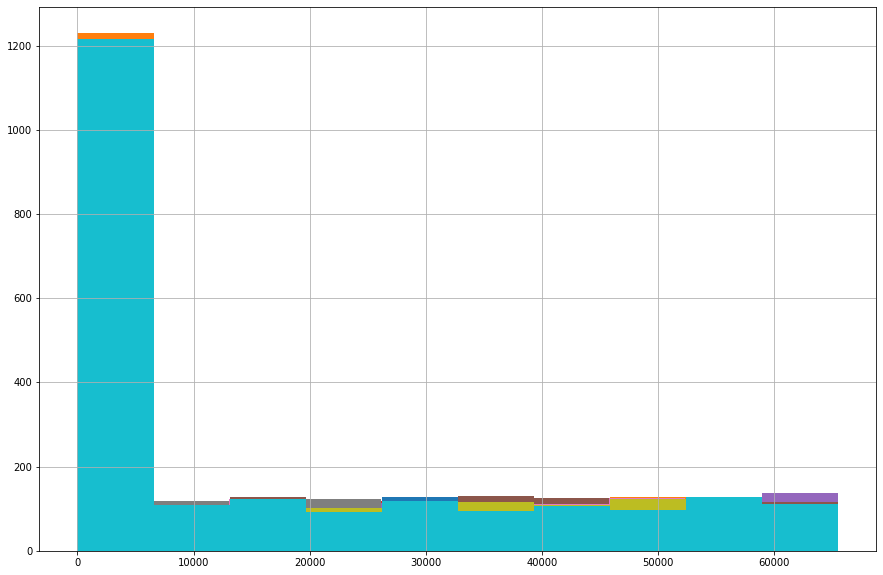

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

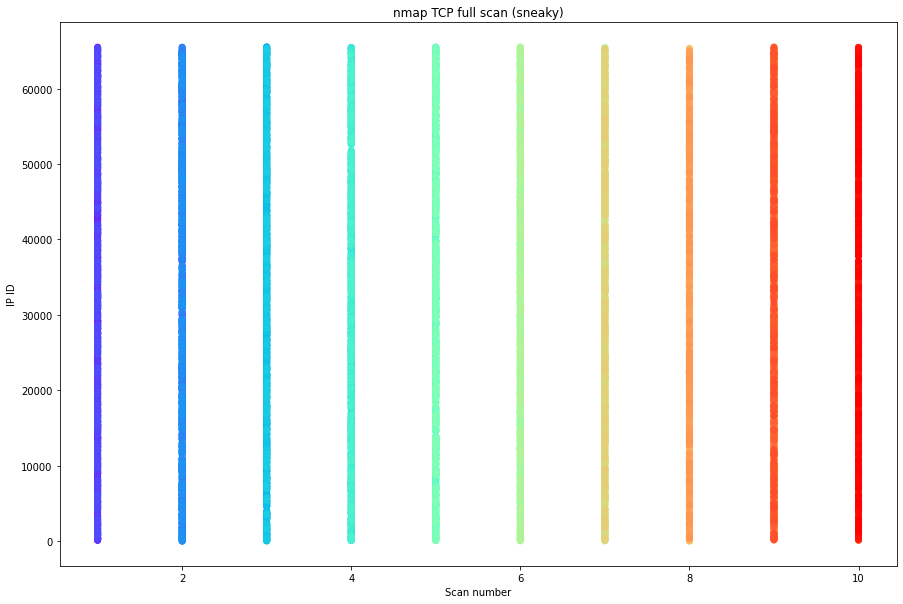

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


In [22]:
ip_ids = []
scan_number = []
#scan_nr = 0
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
-----
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Pack

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
-----
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1764508505
Sequence number: 3433716132
Sequence number: 3686762496
Sequence number: 386590387
Sequence number: 1010356969
Sequence number: 1640307782
Sequence number: 2171781264
Sequence number: 1902682412
Sequence number: 53457437
Sequence number: 2550171609
Sequence number: 2355685234
Sequence number: 2997047581
Sequence number: 289917542
Sequence number: 1427174894
Sequence number: 927440362
Sequence number: 1008088965
Sequence number: 3030957811
Sequence number: 2481838555
Sequence number: 2893304436
Sequence number: 4132105269
Sequence number: 2037898656
Sequence number: 4188151336
Sequence number: 2202493244
Sequence number: 3870473407
Sequence number: 3790661542
Sequence number: 351257542
Sequence number: 978113967
Sequence number: 3323979538
Sequence number: 2130910472
Sequence number: 2552257859
Sequence number: 1489292035
Sequence number: 4078702481
Sequence number: 2003813702
Sequence number: 2952560171
Sequence number: 2075732792
Sequence number: 2229461655

Sequence number: 974888549
Sequence number: 2995091054
Sequence number: 3405521723
Sequence number: 715995652
Sequence number: 350702790
Sequence number: 2713749355
Sequence number: 2791138156
Sequence number: 1449125094
Sequence number: 3882392068
Sequence number: 1495405628
Sequence number: 1682056072
Sequence number: 836139834
Sequence number: 1519961673
Sequence number: 3413851010
Sequence number: 2303041009
Sequence number: 3143504190
Sequence number: 2799074207
Sequence number: 379818750
Sequence number: 31718451
Sequence number: 2334010872
Sequence number: 2702833884
Sequence number: 3285257242
Sequence number: 1484889276
Sequence number: 1579358072
Sequence number: 1313511738
Sequence number: 450751019
Sequence number: 867794508
Sequence number: 3761478831
Sequence number: 1948461798
Sequence number: 3860821884
Sequence number: 3738783867
Sequence number: 3843214606
Sequence number: 450755276
Sequence number: 2457236803
Sequence number: 3659690359
Sequence number: 1921827495
Se

Sequence number: 2092104585
Sequence number: 1112072272
Sequence number: 1285457619
Sequence number: 823532168
Sequence number: 528416280
Sequence number: 1996463704
Sequence number: 2803928810
Sequence number: 2597802908
Sequence number: 4241348049
Sequence number: 35256096
Sequence number: 324808769
Sequence number: 2729152526
Sequence number: 975212425
Sequence number: 1917497580
Sequence number: 2812393471
Sequence number: 4013848589
Sequence number: 2591555582
Sequence number: 2544345878
Sequence number: 1124602694
Sequence number: 1469162635
Sequence number: 3917217268
Sequence number: 1146958201
Sequence number: 3965480271
Sequence number: 2981208554
Sequence number: 1119368329
Sequence number: 546940714
Sequence number: 202022511
Sequence number: 416884656
Sequence number: 1248539438
Sequence number: 2161388595
Sequence number: 1271507182
Sequence number: 2727489626
Sequence number: 1423098360
Sequence number: 3921967689
Sequence number: 2700883130
Sequence number: 4171163864
S

Sequence number: 1627565244
Sequence number: 1779656270
Sequence number: 1598225583
Sequence number: 827870870
Sequence number: 2188491659
Sequence number: 1310141874
Sequence number: 2878720303
Sequence number: 3046136551
Sequence number: 480027668
Sequence number: 3492840306
Sequence number: 1637071993
Sequence number: 505142370
Sequence number: 2734141738
Sequence number: 77474502
Sequence number: 1619779002
Sequence number: 1777461849
Sequence number: 2992525719
Sequence number: 3239092857
Sequence number: 1558598266
Sequence number: 2807610277
Sequence number: 2802959339
Sequence number: 3938310390
Sequence number: 3658417164
Sequence number: 1326328498
Sequence number: 3664999719
Sequence number: 1100407967
Sequence number: 2172499973
Sequence number: 1343771910
Sequence number: 3731868574
Sequence number: 1501288861
Sequence number: 325360554
Sequence number: 3910895398
Sequence number: 3222820124
Sequence number: 1259935234
Sequence number: 3576603401
Sequence number: 187609295

Sequence number: 3264579989
Sequence number: 2933675896
Sequence number: 4146175746
Sequence number: 3050192560
Sequence number: 4223339847
Sequence number: 1290560916
Sequence number: 1073871518
Sequence number: 1883967653
Sequence number: 1534794269
Sequence number: 3990877220
Sequence number: 2691799229
Sequence number: 632061589
Sequence number: 2853240444
Sequence number: 3256925538
Sequence number: 213457339
Sequence number: 398616938
Sequence number: 2956714141
Sequence number: 1491697522
Sequence number: 2797574667
Sequence number: 1861666861
Sequence number: 1243611754
Sequence number: 4001433086
Sequence number: 2559662174
Sequence number: 821601445
Sequence number: 1526915377
Sequence number: 493136748
Sequence number: 1374545948
Sequence number: 2974899689
Sequence number: 2614351006
Sequence number: 1576913584
Sequence number: 1323197422
Sequence number: 2885743953
Sequence number: 1158900880
Sequence number: 2588361951
Sequence number: 682492548
Sequence number: 413852726

Sequence number: 3752353937
Sequence number: 2997154577
Sequence number: 429306859
Sequence number: 112025985
Sequence number: 407014887
Sequence number: 328348985
Sequence number: 952684205
Sequence number: 2731830556
Sequence number: 1368480845
Sequence number: 2136467841
Sequence number: 2775212489
Sequence number: 2670600809
Sequence number: 1813191776
Sequence number: 2713965167
Sequence number: 3339748628
Sequence number: 2515017999
Sequence number: 1590706027
Sequence number: 1630342743
Sequence number: 690599504
Sequence number: 1088527961
Sequence number: 874030283
Sequence number: 853543224
Sequence number: 3014935783
Sequence number: 2413299519
Sequence number: 1193444856
Sequence number: 2021064894
Sequence number: 3919868136
Sequence number: 1484022867
Sequence number: 609501805
Sequence number: 4177566960
Sequence number: 931808113
Sequence number: 4120070017
Sequence number: 279545209
Sequence number: 3039560356
Sequence number: 198064819
Sequence number: 3239056636
Sequ

Sequence number: 1204454884
Sequence number: 2093658649
Sequence number: 2919804882
Sequence number: 4239457384
Sequence number: 3769312757
Sequence number: 3018944241
Sequence number: 1098773865
Sequence number: 3728046855
Sequence number: 177128571
Sequence number: 618076935
Sequence number: 2103570982
Sequence number: 172062940
Sequence number: 2345391219
Sequence number: 2128629318
Sequence number: 654307588
Sequence number: 365154945
Sequence number: 60372840
Sequence number: 2506269471
Sequence number: 2092662420
Sequence number: 4176436328
Sequence number: 189875358
Sequence number: 752951401
Sequence number: 3161258263
Sequence number: 1345586706
Sequence number: 3959044035
Sequence number: 3534216106
Sequence number: 1921058802
Sequence number: 1275191597
Sequence number: 3022520529
Sequence number: 1259859693
Sequence number: 2579623269
Sequence number: 2679258778
Sequence number: 2521552644
Sequence number: 3821673005
Sequence number: 1922812963
Sequence number: 1358846020
S

Sequence number: 3522423420
Sequence number: 4212735592
Sequence number: 1701067283
Sequence number: 1661988109
Sequence number: 3245112558
Sequence number: 997754852
Sequence number: 1901910739
Sequence number: 1819547707
Sequence number: 2470399666
Sequence number: 3136039341
Sequence number: 1714057471
Sequence number: 2051235375
Sequence number: 2417316022
Sequence number: 2882272942
Sequence number: 604186589
Sequence number: 2878797853
Sequence number: 2344657935
Sequence number: 1122947805
Sequence number: 2567760901
Sequence number: 3782476601
Sequence number: 1149829960
Sequence number: 1470761115
Sequence number: 2117995621
Sequence number: 3483099631
Sequence number: 1288267497
Sequence number: 202840730
Sequence number: 3234790810
Sequence number: 3215695977
Sequence number: 2841004080
Sequence number: 3358884134
Sequence number: 2250681663
Sequence number: 473148402
Sequence number: 2125931001
Sequence number: 3727327625
Sequence number: 2928160872
Sequence number: 2588155

Sequence number: 328051203
Sequence number: 2944119466
Sequence number: 1839269588
Sequence number: 3335021387
Sequence number: 396779496
Sequence number: 241911345
Sequence number: 2469204862
Sequence number: 3901553666
Sequence number: 2638884792
Sequence number: 841379220
Sequence number: 2122571427
Sequence number: 1456860656
Sequence number: 3462165275
Sequence number: 1578965346
Sequence number: 1200801015
Sequence number: 1418488209
Sequence number: 3986694381
Sequence number: 2680247624
Sequence number: 2994632016
Sequence number: 3601355764
Sequence number: 2893182603
Sequence number: 896186124
Sequence number: 2185434328
Sequence number: 4172803707
Sequence number: 1237717829
Sequence number: 940175560
Sequence number: 1582932252
Sequence number: 3708438313
Sequence number: 2393983733
Sequence number: 2467849096
Sequence number: 2252690395
Sequence number: 2245823621
Sequence number: 173963615
Sequence number: 788467582
Sequence number: 40840686
Sequence number: 1041200655
Se

Sequence number: 1812575731
Sequence number: 2667530177
Sequence number: 2008077704
Sequence number: 1121345776
Sequence number: 3967471686
Sequence number: 992329923
Sequence number: 2697848102
Sequence number: 3842625899
Sequence number: 2342242663
Sequence number: 4241188047
Sequence number: 3459063924
Sequence number: 228416289
Sequence number: 477693091
Sequence number: 3483353879
Sequence number: 936019172
Sequence number: 3779736611
Sequence number: 2801855517
Sequence number: 2843478023
Sequence number: 3402900818
Sequence number: 165105683
Sequence number: 1814013198
Sequence number: 2164306336
Sequence number: 3204104387
Sequence number: 2896819021
Sequence number: 1518063120
Sequence number: 3180956420
Sequence number: 551257976
Sequence number: 3045812690
Sequence number: 3088259357
Sequence number: 1487496523
Sequence number: 1276168668
Sequence number: 1208147043
Sequence number: 2630485570
Sequence number: 517954616
Sequence number: 2173236330
Sequence number: 1849441170

Sequence number: 463210849
Sequence number: 2853954897
Sequence number: 4009939796
Sequence number: 3969452183
Sequence number: 1699639262
Sequence number: 2378803152
Sequence number: 896763626
Sequence number: 912029243
Sequence number: 738138074
Sequence number: 4108115766
Sequence number: 934892134
Sequence number: 800199133
Sequence number: 1645267308
Sequence number: 3992516768
Sequence number: 2492431907
Sequence number: 1587452829
Sequence number: 2021221406
Sequence number: 950496172
Sequence number: 2246329376
Sequence number: 2088249267
Sequence number: 3797729397
Sequence number: 3289945941
Sequence number: 1685210721
Sequence number: 964778619
Sequence number: 33869337
Sequence number: 3131406249
Sequence number: 3664735559
Sequence number: 586750935
Sequence number: 2444562709
Sequence number: 2642945289
Sequence number: 2207012706
Sequence number: 3378208616
Sequence number: 412551962
Sequence number: 116269204
Sequence number: 3672068177
Sequence number: 860227040
Sequen

Sequence number: 331908398
Sequence number: 3915712406
Sequence number: 3830433879
Sequence number: 4219700576
Sequence number: 88442741
Sequence number: 1261044513
Sequence number: 3872448850
Sequence number: 2898761459
Sequence number: 457039902
Sequence number: 4172296811
Sequence number: 594388937
Sequence number: 1078816075
Sequence number: 88167144
Sequence number: 1317245599
Sequence number: 865746298
Sequence number: 3408341112
Sequence number: 1299285893
Sequence number: 1923872786
Sequence number: 1646933210
Sequence number: 4271012778
Sequence number: 3588345091
Sequence number: 2668880655
Sequence number: 3929315529
Sequence number: 1125759851
Sequence number: 710992095
Sequence number: 2936357029
Sequence number: 3634121642
Sequence number: 3570578362
Sequence number: 557597455
Sequence number: 281252840
Sequence number: 2812094923
Sequence number: 3430944049
Sequence number: 1227477270
Sequence number: 367353434
Sequence number: 2853868196
Sequence number: 1944035561
Sequ

Sequence number: 1740670598
Sequence number: 3566831270
Sequence number: 889197707
Sequence number: 3872937287
Sequence number: 2708623634
Sequence number: 2541361961
Sequence number: 2314416322
Sequence number: 969070762
Sequence number: 3382673192
Sequence number: 3659642615
Sequence number: 3366305638
Sequence number: 2742730179
Sequence number: 4144734397
Sequence number: 368415758
Sequence number: 172931667
Sequence number: 227945999
Sequence number: 1014121740
Sequence number: 593641013
Sequence number: 3910395219
Sequence number: 3401802651
Sequence number: 1583089122
Sequence number: 370951850
Sequence number: 3429587644
Sequence number: 2344341488
Sequence number: 3947482136
Sequence number: 3572684348
Sequence number: 2654728172
Sequence number: 3183176243
Sequence number: 4201554460
Sequence number: 1684086162
Sequence number: 1000403263
Sequence number: 4254161662
Sequence number: 2674449398
Sequence number: 408462567
Sequence number: 1760664528
Sequence number: 938582110
S

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


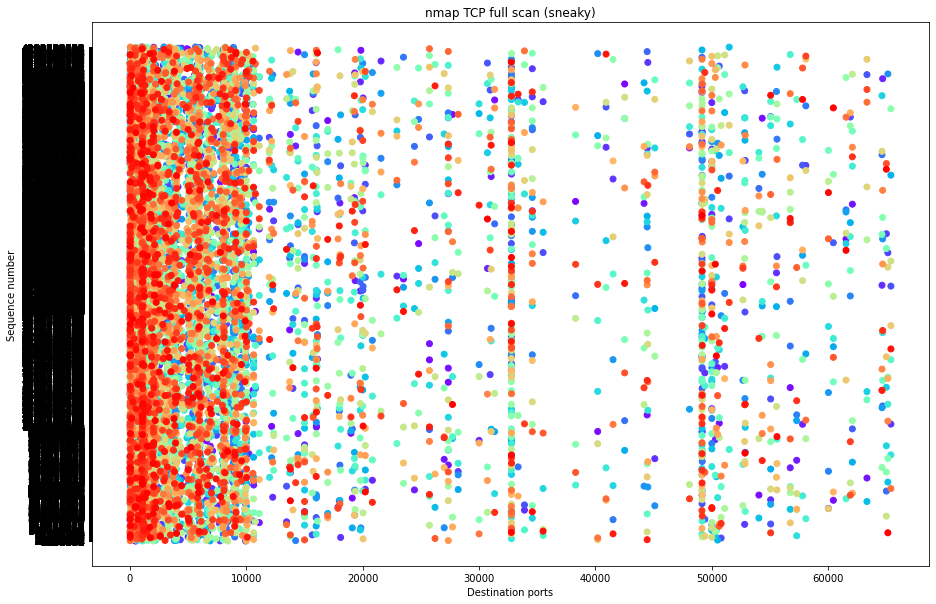

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

7743

In [31]:
orders_port['sport'].value_counts()[:30]

36736    7
39478    6
53510    6
44682    6
33470    5
42566    5
35508    5
53414    5
51100    5
33460    5
50114    5
40108    5
37818    5
42454    5
54394    5
35406    5
53534    5
34796    5
42594    5
38024    5
51234    5
53604    5
40080    5
53582    5
50626    4
34000    4
53708    4
36418    4
48328    4
46626    4
Name: sport, dtype: int64

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F